In [60]:
!pip install pandas seaborn

  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Obtaining dependency information for matplotlib!=3.6.1,>=3.4 from https://files.pythonhosted.org/packages/36/11/62250ea25780d4b59c2c6044ec161235c47cc05a18d0ec0a05657de75b7d/matplotlib-3.8.4-cp311-cp311-macosx_10_12_x86_64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/33/0e/51ff72fac17e2500baf30b6b2a24be423a8d27e1625e5de99f585b852d74/contourpy-1.2.1-cp311-cp311-macosx_10_9_x86_64.whl.metadata
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  

In [3]:
import pandas as pd

In [32]:
df = pd.read_csv("desktop_ui_evaluation.csv").drop(columns=['Image number'])

In [91]:
correct_pct = (~(df == 'x')).sum()/len(df)
top_k_pct = [(df.replace('x', 100).astype(int) <= i).sum().to_frame().rename(columns={0: i})/len(df) for i in range(5,0,-1)]
wdf = pd.concat([correct_pct]+top_k_pct,axis=1).rename(columns={0: 6})
wdf

,6,5,4,3,2,1
git-large,0.568627,0.549020,0.509804,0.392157,0.352941,0.274510
blip-large,0.549020,0.529412,0.490196,0.450980,0.352941,0.176471
lblip-base,0.588235,0.549020,0.411765,0.333333,0.215686,0.176471
lblip-large,0.509804,0.509804,0.470588,0.372549,0.294118,0.196078
pix2struct-base,0.647059,0.588235,0.549020,0.509804,0.470588,0.333333
pix2struct-large,0.627451,0.568627,0.509804,0.372549,0.352941,0.215686
git-base-coco,0.156863,0.156863,0.137255,0.078431,0.058824,0.000000
git-large-coco,0.509804,0.490196,0.450980,0.372549,0.254902,0.156863


<Axes: >

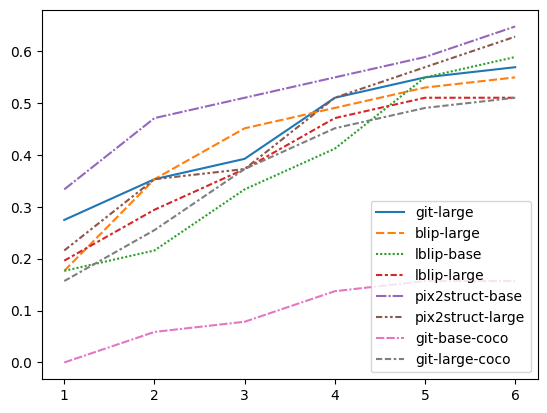

In [92]:
import seaborn as sns

sns.lineplot(wdf.T)

In [72]:
nopx = df[df['pix2struct-base']=='x'].drop(columns=['pix2struct-base'])
nopx

,git-large,blip-large,lblip-base,lblip-large,pix2struct-large,git-base-coco,git-large-coco
3,4,2,1,2,6,x,4
8,x,1,3,4,x,x,2
9,4,2,2,x,1,x,4
11,2,3,1,x,x,x,4
12,x,x,1,x,x,2,x
14,4,1,x,x,2,3,x
15,x,2,1,2,4,x,5
20,1,x,3,x,4,x,1
25,1,1,x,x,4,x,1
28,x,x,x,x,x,x,x


In [93]:
correct_pct = (~(nopx == 'x')).sum()/len(nopx)
top_k_pct = [(nopx.replace('x', 100).astype(int) <= i).sum().to_frame().rename(columns={0: i})/len(nopx) for i in range(5,0,-1)]
wdpx = pd.concat([correct_pct]+top_k_pct,axis=1).rename(columns={0: 6})
wdpx

,6,5,4,3,2,1
git-large,0.444444,0.444444,0.444444,0.277778,0.277778,0.222222
blip-large,0.611111,0.611111,0.611111,0.611111,0.555556,0.277778
lblip-base,0.555556,0.555556,0.500000,0.500000,0.388889,0.333333
lblip-large,0.277778,0.277778,0.277778,0.222222,0.222222,0.111111
pix2struct-large,0.500000,0.444444,0.444444,0.166667,0.166667,0.111111
git-base-coco,0.111111,0.111111,0.111111,0.111111,0.055556,0.000000
git-large-coco,0.500000,0.500000,0.444444,0.277778,0.222222,0.166667


<Axes: >

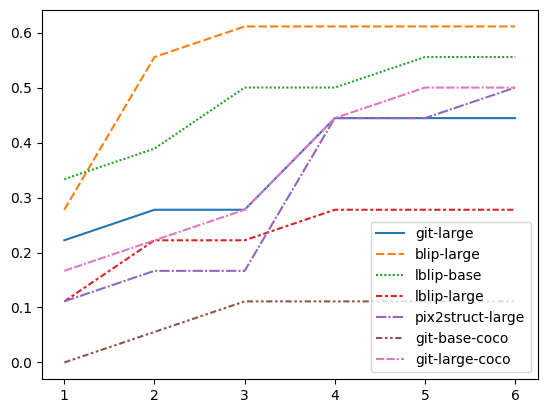

In [94]:
sns.lineplot(wdpx.T)

In [95]:
rest_of_models = ["git-large", "blip-large", "lblip-base", "lblip-large", "pix2struct-large", "git-base-coco", "git-large-coco"]

In [97]:
rest_of_models

['git-large',
 'blip-large',
 'lblip-base',
 'lblip-large',
 'pix2struct-large',
 'git-base-coco',
 'git-large-coco']

In [111]:
ndf = df.copy()

In [112]:
def min_cap_result(res1,res2):
    if res1 == 'x':
        return res2
    if res2 == 'x':
        return res1
    return min(res1,res2)

for model in rest_of_models:
    ndf[model+'+pix2struct-base']=ndf.apply(lambda row: min_cap_result(row[model],row["pix2struct-base"]),axis=1)
ndf = ndf.drop(columns=rest_of_models)

In [113]:
correct_pct = (~(ndf == 'x')).sum()/len(ndf)
top_k_pct = [(ndf.replace('x', 100).astype(int) <= i).sum().to_frame().rename(columns={0: i})/len(ndf) for i in range(5,0,-1)]
ndfx = pd.concat([correct_pct]+top_k_pct,axis=1).rename(columns={0: 6})
ndfx

,6,5,4,3,2,1
pix2struct-base,0.647059,0.588235,0.549020,0.509804,0.470588,0.333333
git-large+pix2struct-base,0.803922,0.784314,0.784314,0.705882,0.686275,0.568627
blip-large+pix2struct-base,0.862745,0.862745,0.843137,0.803922,0.705882,0.450980
lblip-base+pix2struct-base,0.843137,0.843137,0.764706,0.745098,0.647059,0.470588
lblip-large+pix2struct-base,0.745098,0.745098,0.745098,0.666667,0.607843,0.450980
pix2struct-large+pix2struct-base,0.823529,0.764706,0.725490,0.607843,0.568627,0.411765
git-base-coco+pix2struct-base,0.686275,0.647059,0.607843,0.549020,0.490196,0.333333
git-large-coco+pix2struct-base,0.823529,0.803922,0.784314,0.705882,0.647059,0.470588


<Axes: >

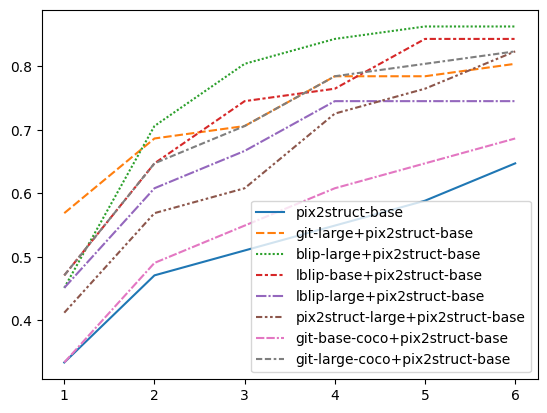

In [114]:
sns.lineplot(ndfx.T)